In [1]:
### shelter animal outcome prediction ###
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab
%matplotlib inline 

In [2]:
shelter = pd.read_csv('train.csv')

In [3]:
shelter.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
label = shelter.iloc[:,3].astype('category')

## feature extraction

In [5]:
# name
name = shelter.iloc[:,1]
Nameless = []
for item in name:
    if str(item) == 'nan':
        Nameless.append(1)
    else:
        Nameless.append(0)
Nameless = pd.Series(Nameless)

In [6]:
# time
def turn_str(i):
    i = str(i)
    return i
DateTime = shelter.iloc[:,2].apply(turn_str)

def time(i):
    if int(i[11:13]) < 7:
        return 'early morning'
    elif int(i[11:13]) < 12:
        return ' morning'
    elif int(i[11:13]) < 18:
        return 'afternoon'
    else:
        return 'evening'
Time = DateTime.apply(time)

In [7]:
# animal type
Animal_type = shelter.iloc[:,5]

In [8]:
# gender and surgery
foo = shelter.iloc[:,6].str.split(" ")
Gender = []
Intact = []
for item in foo:
    if str(item) == 'nan':
        Gender.append('Unknown')
        Intact.append('Unknown')
    elif item[0] == 'Unknown':
        Gender.append('Unknown')
        Intact.append('Unknown')
    else:
        Gender.append(item[1])
        if item[0] == 'Intact':
            Intact.append(1)
        else:
            Intact.append(0)
Gender = pd.Series(Gender)
Intact = pd.Series(Intact)

In [9]:
# age
AgeuponOutcome = shelter.iloc[:,7].str.split(" ")
multiplier = []
quant = []
for item in AgeuponOutcome:
    if str(item) == 'nan':
        multiplier.append(0)
        quant.append(0)
    else:
        quant.append(item[0])
        if 'year' in item[1]:
            multiplier.append(365)
        elif 'month' in item[1]:
            multiplier.append(30)
        else:
            multiplier.append(1)
multiplier = np.array(multiplier).astype(int)
quant = np.array(quant).astype(int)
Age = pd.Series(multiplier*quant)
Age_categorical = []
for item in Age:
    if item <= 60:
        Age_categorical.append('baby')
    elif item <= 365:
        Age_categorical.append('young')
    elif item <= 1095:
        Age_categorical.append('adult')
    else:
        Age_categorical.append('old')
Age_categorical = pd.Series(Age_categorical)

In [10]:
# breed
foo_split = shelter.iloc[:,8].str.split("/")
Mix = []
Breed = []
for item in foo_split:
    if str(item) == 'nan':
        Mix.append('Unknown')
        Breed.append('Unknown')
    elif len(item) == 2:
        if item[1][-3:] == 'Mix':
            Mix.append(1)
            Breed.append(item[0][:-3])
        else:
            Mix.append(0)
            Breed.append(item[0][:-3])
    else:
        if item[0][-3:] == 'Mix':
            Mix.append(1)
            Breed.append(item[0][:-3])
        else:
            Mix.append(0)
            Breed.append(item[0][:-3])
Mix = pd.Series(Mix)
Breed = pd.Series(Breed)

In [11]:
# color
foo = shelter.iloc[:,9].str.split("/")
Bicolor = []
Tabby = []
Color = []
for item in foo:
    if len(item) == 1:
        Bicolor.append(0)
        if 'Tabby' in item[0]:
            Tabby.append(1)
        else:
            Tabby.append(0)
        Color.append(item[0])
    else:
        Bicolor.append(1)
        if 'Tabby' in item[0] or 'Tabby' in item[1]:
            Tabby.append(1)
        else:
            Tabby.append(0)
        Color.append(item[0])
Bicolor = pd.Series(Bicolor)
Tabby = pd.Series(Tabby)
# split color
foo_color = pd.Series(Color).str.split(" ")
Color = []
for item in foo_color:
    if len(item) == 1:
        Color.append(item[0])
    else:
        Color.append(item[0])
Color = pd.Series(Color)

In [12]:
features = pd.concat([Nameless,Time,Animal_type,Gender,Intact,Age,Age_categorical,Mix,Breed,Bicolor,Tabby,Color],axis=1)
features.columns = ['Nameless','Time','Animal_type','Gender','Intact','Age','Age_categorical','Mix','Breed','Bicolor','Tabby','Color']
features.head()

,Nameless,Time,Animal_type,Gender,Intact,Age,Age_categorical,Mix,Breed,Bicolor,Tabby,Color
0,0,evening,Dog,Male,0,365,young,1,Shetland Sheepdog,1,0,Brown
1,0,afternoon,Cat,Female,0,365,young,1,Domestic Shorthair,0,1,Cream
2,0,afternoon,Dog,Male,0,730,adult,1,Pit Bull,1,0,Blue
3,1,evening,Cat,Male,1,3,baby,1,Domestic Shorthair,0,0,Blue
4,1,afternoon,Dog,Male,0,730,adult,0,Lhasa A,0,0,Tan


In [13]:
features.describe()

,Nameless,Age,Mix,Bicolor,Tabby
count,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000
mean,0.287740,792.531296,0.834225,0.520932,0.194171
std,0.452718,1083.429636,0.371885,0.499571,0.395569
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.000000,1.000000,0.000000,0.000000
50%,0.000000,365.000000,1.000000,1.000000,0.000000
75%,1.000000,1095.000000,1.000000,1.000000,0.000000
max,1.000000,7300.000000,1.000000,1.000000,1.000000


## train and test split

In [259]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.1,random_state=1, stratify=label)

## anamoly detection

## visualization

In [153]:
## plot data
plt_data = pd.concat([pd.DataFrame(X_train).reset_index(),pd.Series(y_train)],axis=1)
plt_data.columns = ['index','Nameless','Time','Animal_type','Gender','Intact','Age','Age_categorical','Mix','Breed','Bicolor','Tabby','Color','Label']
plt_data.drop('index',axis=1)

,Nameless,Time,Animal_type,Gender,Intact,Age,Age_categorical,Mix,Breed,Bicolor,Tabby,Color,Label
0,0,afternoon,Dog,Male,0,365,young,1,Australian Cattle Dog,1,0,Red,Return_to_owner
1,0,afternoon,Cat,Female,0,150,young,1,Domestic Shorthair,0,1,Orange,Adoption
2,0,afternoon,Dog,Female,0,365,young,1,Australian Shepherd,1,0,White,Return_to_owner
3,0,afternoon,Dog,Female,0,120,young,1,Pit Bull,1,0,Brown,Transfer
4,0,afternoon,Cat,Male,0,210,young,0,Domestic Medium H,0,1,Orange,Adoption
5,0,afternoon,Dog,Female,0,730,adult,1,Yorkshire Terrier,1,0,Gray,Transfer
6,0,afternoon,Cat,Male,0,60,baby,1,Domestic Longhair,1,0,Black,Adoption
7,0,afternoon,Cat,Male,0,3650,old,1,Domestic Shorthair,0,1,Brown,Adoption
8,0,evening,Dog,Female,0,60,baby,1,Jack Russell Terrier,1,0,White,Adoption
9,1,afternoon,Dog,Male,0,150,young,0,Australian Kel,1,0,Brown,Transfer


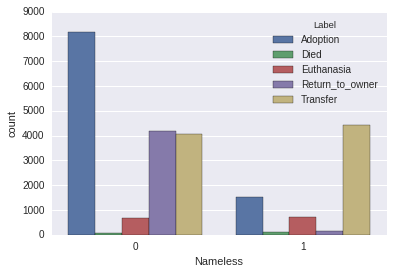

In [154]:
#plot
# whether animal have a name
sns.countplot(x='Nameless',hue='Label',data=plt_data)
plt.savefig('name.png')

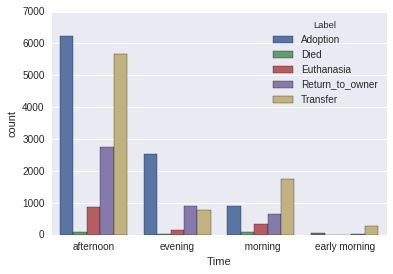

In [155]:
# time
sns.countplot(x='Time',hue='Label',data=plt_data)
plt.savefig('time.png')

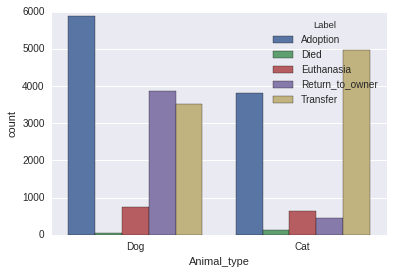

In [156]:
# Animal Type
sns.countplot(x='Animal_type',hue='Label',data=plt_data)
plt.savefig('animal.png')

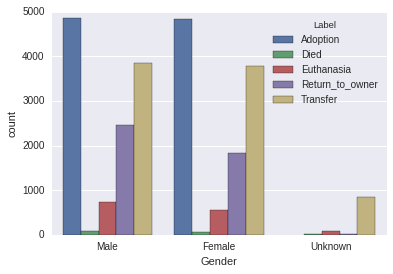

In [157]:
# Gender
sns.countplot(x='Gender',hue='Label',data=plt_data)
plt.savefig('gender.png')

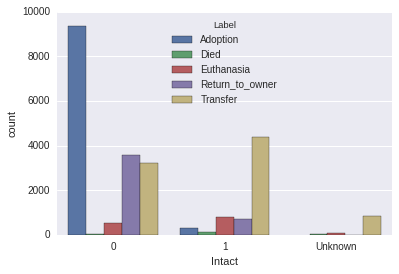

In [158]:
# Intact
sns.countplot(x='Intact',hue='Label',data=plt_data)
plt.savefig('intact.png')

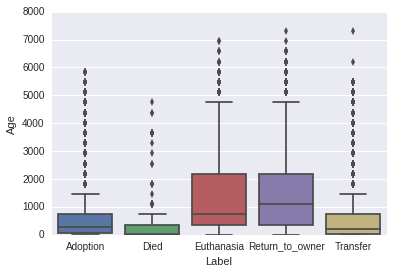

In [159]:
# age
sns.boxplot(x='Label',y='Age',data=plt_data)
plt.savefig('age.png')

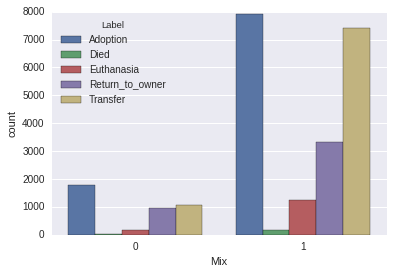

In [160]:
# Mix
sns.countplot(x='Mix',hue='Label',data=plt_data)
plt.savefig('mix.png')

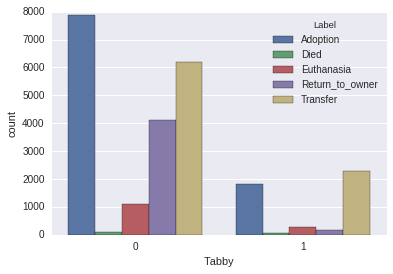

In [161]:
# Tabby
sns.countplot(x='Tabby',hue='Label',data=plt_data)
plt.savefig('tabby.png')

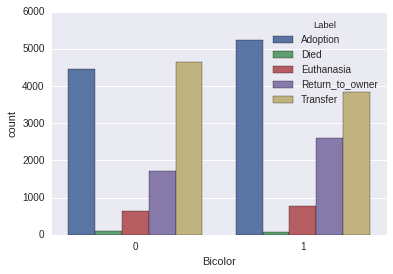

In [162]:
# bicolor
sns.countplot(x='Bicolor',hue='Label',data=plt_data)
plt.savefig('bicolor.png')

## test for independence

In [163]:
from scipy import stats

In [164]:
# Nameless
pivoted_Nameless = pd.crosstab(plt_data.Nameless,plt_data.Label)
pivoted_Nameless = np.array(pivoted_Nameless)

# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Nameless)
p

0.0

In [165]:
# time
pivoted_Time = pd.crosstab(plt_data.Time,plt_data.Label)
pivoted_Time = np.array(pivoted_Time)

# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Time)
p

0.0

In [166]:
# animal type
pivoted_Animal = pd.crosstab(plt_data.Animal_type,plt_data.Label)
pivoted_Animal = np.array(pivoted_Animal)
print pivoted_Animal
# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Animal)
p

[[3823  133  645  448 4958]
 [5869   44  754 3859 3522]]


0.0

In [167]:
# gender
pivoted_Gender = pd.crosstab(plt_data.Gender,plt_data.Label)
pivoted_Gender = np.array(pivoted_Gender)[:2]
# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Gender)
p

1.5019891348046218e-16

In [168]:
# Intact
pivoted_Intact = pd.crosstab(plt_data.Intact,plt_data.Label)
pivoted_Intact = np.array(pivoted_Intact)
# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Intact)
p

0.0

In [169]:
# Mix
pivoted_Mix = pd.crosstab(plt_data.Mix,plt_data.Label)
pivoted_Mix = np.array(pivoted_Mix)
# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Mix)
p

1.5908679314060933e-56

In [170]:
# Tabby
pivoted_Tabby = pd.crosstab(plt_data.Tabby,plt_data.Label)
pivoted_Tabby = np.array(pivoted_Tabby)
# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Tabby)
p

9.6834937608350548e-214

In [171]:
# bicolor
pivoted_Bicolor = pd.crosstab(plt_data.Bicolor,plt_data.Label)
pivoted_Bicolor = np.array(pivoted_Bicolor)
# test
g, p, dof, expctd = stats.chi2_contingency(pivoted_Bicolor)
p

5.5282128677167639e-62

## preprocess features

In [172]:
# time
from sklearn import preprocessing
le_time = preprocessing.LabelEncoder()
X_train.Time = le_time.fit_transform(X_train.Time)

In [173]:
# nameless
le_nameless = preprocessing.LabelEncoder()
X_train.Nameless = le_nameless.fit_transform(X_train.Nameless)

In [174]:
# animal type
le_animal = preprocessing.LabelEncoder()
X_train.Animal_type = le_animal.fit_transform(X_train.Animal_type)

In [175]:
# gender
le_gender = preprocessing.LabelEncoder()
X_train.Gender = le_gender.fit_transform(X_train.Gender)

In [176]:
# intact
le_intact = preprocessing.LabelEncoder()
X_train.Intact = le_intact.fit_transform(X_train.Intact)

In [177]:
# mix
le_mix = preprocessing.LabelEncoder()
X_train.Mix = le_mix.fit_transform(X_train.Mix)

In [178]:
# breed
le_breed = preprocessing.LabelEncoder()
X_train.Breed = le_breed.fit_transform(X_train.Breed)

In [179]:
# tabby
le_tabby = preprocessing.LabelEncoder()
X_train.Tabby = le_tabby.fit_transform(X_train.Tabby)

In [180]:
# bicolor
le_bicolor = preprocessing.LabelEncoder()
X_train.Bicolor = le_bicolor.fit_transform(X_train.Bicolor)

In [181]:
# color
le_color = preprocessing.LabelEncoder()
X_train.Color = le_tabby.fit_transform(X_train.Color)

In [182]:
# age_categorical
le_age = preprocessing.LabelEncoder()
X_train.Age_categorical = le_age.fit_transform(X_train.Age_categorical)

In [183]:
# label
le_label = preprocessing.LabelEncoder()
y_train = le_label.fit_transform(y_train)

In [184]:
# train data for tree based model
# drop categorical age feature
X_train_tree = X_train.drop('Age_categorical',axis=1)

# train data for NB based model
# drop age feature
X_train_nb = X_train.drop('Age',axis=1)

## train model

In [185]:
### random forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train_tree,y_train)

In [186]:
# train classifier
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(X_train_nb,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## tune parameters

In [187]:
## random forest
from sklearn.grid_search import GridSearchCV
param_grid_rf = {"max_depth": [3, None],
                 "max_features": [1, 3, 5, 7, 10],
                 "min_samples_split": [1, 3, 5, 7, 10],
                 "min_samples_leaf": [1, 3, 5, 7, 10],
                 "bootstrap": [True, False],
                 "criterion": ["gini", "entropy"]}

# run grid search
clf_rf_tuned = GridSearchCV(clf_rf, param_grid=param_grid_rf,scoring ='log_loss')
clf_rf_tuned.fit(X_train_tree, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'min_samples_leaf': [1, 3, 5, 7, 10], 'min_samples_split': [1, 3, 5, 7, 10], 'criterion': ['gini', 'entropy'], 'max_features': [1, 3, 5, 7, 10], 'max_depth': [3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [188]:
## Naive Bayes
from sklearn.grid_search import GridSearchCV
param_grid_nb = {'alpha':[1,0.1,0.01,0.001,0.0001,0],
                 'fit_prior':[True,False]}

# run grid search
clf_nb_tuned = GridSearchCV(clf_nb, param_grid=param_grid_nb,scoring='log_loss')
clf_nb_tuned.fit(X_train_nb, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0], 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

## Test on testing dataset

In [260]:
## feature preporcess
le_time = preprocessing.LabelEncoder()
X_test.Time = le_time.fit_transform(X_test.Time)

# nameless
le_nameless = preprocessing.LabelEncoder()
X_test.Nameless = le_nameless.fit_transform(X_test.Nameless)

# animal type
le_animal = preprocessing.LabelEncoder()
X_test.Animal_type = le_animal.fit_transform(X_test.Animal_type)

# gender
le_gender = preprocessing.LabelEncoder()
X_test.Gender = le_gender.fit_transform(X_test.Gender)

# intact
le_intact = preprocessing.LabelEncoder()
X_test.Intact = le_intact.fit_transform(X_test.Intact)

# mix
le_mix = preprocessing.LabelEncoder()
X_test.Mix = le_mix.fit_transform(X_test.Mix)

# breed
le_breed = preprocessing.LabelEncoder()
X_test.Breed = le_breed.fit_transform(X_test.Breed)

# tabby
le_tabby = preprocessing.LabelEncoder()
X_test.Tabby = le_tabby.fit_transform(X_test.Tabby)

# bicolor
le_bicolor = preprocessing.LabelEncoder()
X_test.Bicolor = le_bicolor.fit_transform(X_test.Bicolor)

# color
le_color = preprocessing.LabelEncoder()
X_test.Color = le_tabby.fit_transform(X_test.Color)

# age_categorical
le_age = preprocessing.LabelEncoder()
X_test.Age_categorical = le_label.fit_transform(X_test.Age_categorical)

# label
le_label = preprocessing.LabelEncoder()
y_test = le_label.fit_transform(y_test)

In [261]:
# for Random forest
X_test_tree = X_test.drop('Age_categorical',axis=1)
y_pred = clf_rf.predict_proba(X_test_tree)

from sklearn.metrics import log_loss
print log_loss(y_test,y_pred)

# for tune Random forest
X_test_tree = X_test.drop('Age_categorical',axis=1)
y_pred = clf_rf_tuned.predict_proba(X_test_tree)


from sklearn.metrics import log_loss
print log_loss(y_test,y_pred)


3.29110791375
0.873548571585


In [262]:
# for naive bayes
X_test_nb = X_test.drop('Age',axis=1)
y_pred = clf_nb.predict_proba(X_test_nb)

from sklearn.metrics import log_loss
print log_loss(y_test,y_pred)

# for tuned naive bayes
X_test_nb = X_test.drop('Age',axis=1)
y_pred = clf_nb_tuned.predict_proba(X_test_nb)


from sklearn.metrics import log_loss
print log_loss(y_test,y_pred)



1.01641181376
1.01641181376


In [263]:
## result visulization on testing set

# predict
y_pred = clf_rf_tuned.predict(X_test_tree)

# inverse encode label
y_pred = le_label.inverse_transform(y_pred)

# inverse test label
y_test = le_label.inverse_transform(y_test)

In [264]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['pred']
y_test = pd.DataFrame(y_test)
y_test.columns = ['test']

In [265]:
print y_pred

                 pred
0          Euthanasia
1            Adoption
2            Adoption
3            Transfer
4            Transfer
5            Adoption
6            Adoption
7            Adoption
8            Adoption
9            Transfer
10           Adoption
11           Adoption
12           Transfer
13           Adoption
14           Adoption
15           Adoption
16           Adoption
17           Adoption
18           Transfer
19           Adoption
20           Adoption
21           Transfer
22           Transfer
23           Adoption
24           Transfer
25           Transfer
26           Transfer
27           Adoption
28           Adoption
29           Adoption
...               ...
2644         Transfer
2645         Adoption
2646         Adoption
2647         Adoption
2648         Transfer
2649         Adoption
2650         Adoption
2651         Adoption
2652         Adoption
2653         Adoption
2654         Adoption
2655         Adoption
2656  Return_to_owner
2657      

In [266]:
print y_test

                 test
0          Euthanasia
1     Return_to_owner
2            Adoption
3            Transfer
4            Transfer
5            Transfer
6            Adoption
7            Adoption
8            Transfer
9            Transfer
10           Adoption
11           Adoption
12           Transfer
13           Adoption
14    Return_to_owner
15           Adoption
16           Adoption
17           Adoption
18           Transfer
19           Adoption
20           Transfer
21           Transfer
22         Euthanasia
23           Adoption
24           Transfer
25    Return_to_owner
26           Transfer
27           Adoption
28    Return_to_owner
29    Return_to_owner
...               ...
2644         Transfer
2645         Adoption
2646         Adoption
2647         Adoption
2648         Transfer
2649         Adoption
2650         Adoption
2651         Adoption
2652         Adoption
2653         Adoption
2654         Transfer
2655         Transfer
2656  Return_to_owner
2657      

In [267]:
import ggplot as gg

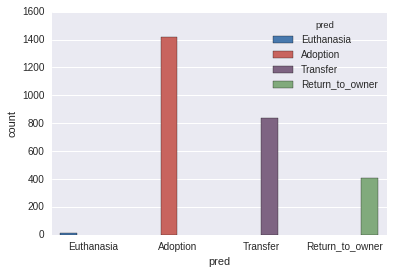

In [275]:
# visualize
colors = ['windows blue','pale red', 'dusty purple','faded green']
sns.countplot(x='pred',hue='pred',data=y_pred,palette=sns.xkcd_palette(colors))
plt.savefig('pred.png')

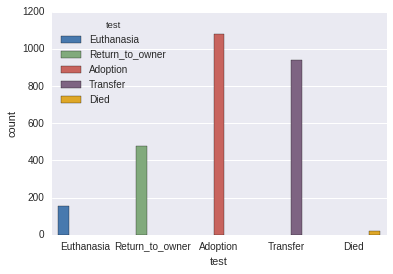

In [273]:
# visualize
colors = ['windows blue','faded green', 'pale red', 'dusty purple','amber']
sns.countplot(x='test',hue='test',data=y_test,palette=sns.xkcd_palette(colors))
plt.savefig('test.png')